<a href="https://colab.research.google.com/github/Henil21/University-Research/blob/main/Copy_of_itm_brain_adam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
Brain_train='/content/drive/MyDrive/Brain_multiclass/Training/'
Brain_test='/content/drive/MyDrive/Brain_multiclass/Testing/'

In [8]:
import random
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir,target_class):

   # getting class vise dir link
   target=target_dir+target_class

   # taking 1 random image from a list of all images under a class
   random_img=random.sample(os.listdir(target),1)

   #as we have stored it in list we need to access it through index which is zero
   image=mpimg.imread(target+'/'+random_img[0])

   fig = plt.figure(figsize=(5, 2))  # Set the width and height of the figure


   #plotting image
   plt.imshow(image)

   plt.axis("off")
   print(f"img shape:{image.shape}")

In [ ]:
view_random_image(target_dir=Brain_train,target_class='meningioma')

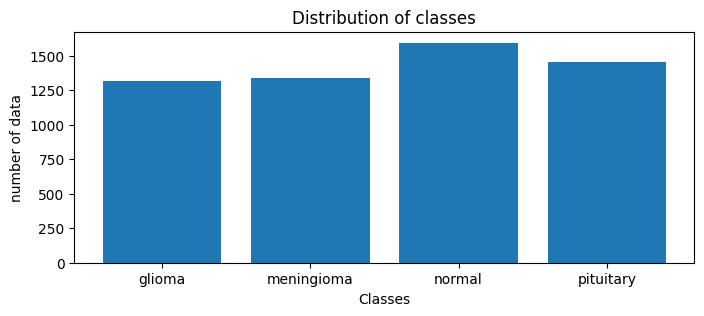

In [9]:

# getting length of the sub classes
gol=len(os.listdir('/content/drive/MyDrive/Brain_multiclass/Training/glioma'))
men=len(os.listdir('/content/drive/MyDrive/Brain_multiclass/Training/meningioma'))
Normal=len(os.listdir('/content/drive/MyDrive/Brain_multiclass/Training/notumor'))
pit=len(os.listdir('/content/drive/MyDrive/Brain_multiclass/Training/pituitary'))

classes=['glioma', "meningioma",'normal','pituitary']
values=[gol,men,Normal,pit]

fig = plt.figure(figsize=(8, 3))  # Set the width and height of the figure

plt.bar(classes,values)

# Adding title to the plot
plt.title("Distribution of classes")

# Adding label on the y-axis
plt.ylabel('number of data')

# Adding label on the x-axis
plt.xlabel('Classes')

plt.show()

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator




# recaling pixels
train_data_gen = ImageDataGenerator(rescale=1./255)

# dividing into batches and
train_generator_brain = train_data_gen.flow_from_directory(
    Brain_train,
    target_size=(224, 224), #targeted shape
    batch_size=32, #32  images per batch
     shuffle=True,
     seed=42,
    class_mode='categorical' ,# we are working with multiclass problem
     #shuffle=True
)


# recaling pixels
test_data_gen_brain = ImageDataGenerator(rescale=1./255)

# dividing into batches and
test_generator_brain = train_data_gen.flow_from_directory(
    Brain_test,
    seed=42,
    shuffle=False,
    target_size=(224, 224), #targeted shape
    batch_size=32, #32  images per batch
    class_mode='categorical', # we are working with multiclass problem
     #shuffle=True
)

Found 5712 images belonging to 4 classes.
Found 1316 images belonging to 4 classes.


In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras import Sequential
tf.random.set_seed(42)

# Model_2=Sequential([
#     Conv2D(500,3,activation='relu', input_shape=(224,224,3)),  #3 is kernal size
#     MaxPool2D(),
#     Conv2D(250, 3, activation='relu'),
#     MaxPool2D(),
#     Conv2D(250, 3, activation='relu'),
#     MaxPool2D(),

#     Flatten(),
#     Dense(4, activation='softmax') # softmax as we are working with multiclass problem
# ])
# Model_2.compile(loss='categorical_crossentropy', # as we got multiple classes
#                             optimizer=tf.keras.optimizers.Adam(), # for now lets dont specify the learning rate,  default is 0.001 and we will also try Rmspromp
#                             metrics=['accuracy'])# evaluation

# history_2=Model_2.fit(train_generator_brain,
#                    epochs=5,
#                     steps_per_epoch=len(# dividing into batches and
#                   train_generator_brain  ),
#                    validation_data=(test_generator_brain),
#                    validation_steps=len(test_generator_brain ))

In [15]:
tf.random.set_seed(42)

model_3=Sequential([
    Conv2D(500,3,activation='relu', input_shape=(224,224,3)),  #3 is kernal size
    MaxPool2D(),
    Conv2D(250, 3, activation='relu'),
    MaxPool2D(),
     Conv2D(250, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(4, activation='softmax') # softmax as we are working with multiclass problem
])
# we clone the above model  architecture
model_3.compile(loss='categorical_crossentropy', # as we got multiple classes
                            optimizer=tf.keras.optimizers.RMSprop(), # for now lets dont specify the learning rate,  default is 0.001 and we will also try Rmspromp
                            metrics=['accuracy'])# evaluation

history_3=model_3.fit(train_generator_brain,
                   epochs=5,
                    steps_per_epoch=len(# dividing into batches and
                  train_generator_brain  ),
                   validation_data=(test_generator_brain),
                   validation_steps=len(test_generator_brain ))

Epoch 1/5
179/179 [==============================] - 1096s 6s/step - loss: 1.0167 - accuracy: 0.6560 - val_loss: 0.5511 - val_accuracy: 0.7880
Epoch 2/5
179/179 [==============================] - 99s 554ms/step - loss: 0.4153 - accuracy: 0.8456 - val_loss: 0.3754 - val_accuracy: 0.8731
Epoch 3/5
179/179 [==============================] - 98s 549ms/step - loss: 0.2312 - accuracy: 0.9242 - val_loss: 0.3138 - val_accuracy: 0.8875
Epoch 4/5
179/179 [==============================] - 99s 550ms/step - loss: 0.1386 - accuracy: 0.9540 - val_loss: 0.1768 - val_accuracy: 0.9430
Epoch 5/5
179/179 [==============================] - 99s 550ms/step - loss: 0.0943 - accuracy: 0.9688 - val_loss: 0.2015 - val_accuracy: 0.9491


In [16]:
import numpy as np
y_pred=model_3.predict(test_generator_brain)
# yy_pred=model_3.predict(test_generator_brain)
# yy_pred=np.argmax(yy_pred,axis=-1)
y_pred=np.argmax(y_pred,axis=-1)


42/42 [==============================] - 7s 174ms/step


In [ ]:
model_3.evaluate(test_generator_brain)

In [18]:
y_true=test_generator_brain.labels


In [19]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have a trained model named 'model' and an image data generator named 'data_generator'
# predictions = model.predict_generator(data_generator)
# predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class labels
# true_classes = data_generator.classes
class_labels = list(test_generator_brain.class_indices.keys())
# y_pred=np.sort(y_pred)
confusion_mtx = confusion_matrix(y_true, y_pred)

report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)


              precision    recall  f1-score   support

      glioma       0.96      0.90      0.93       300
  meningioma       0.89      0.90      0.90       311
     notumor       0.96      1.00      0.98       405
   pituitary       0.98      0.98      0.98       300

    accuracy                           0.95      1316
   macro avg       0.95      0.95      0.95      1316
weighted avg       0.95      0.95      0.95      1316

